In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import simulate
import sharpe
import seaborn as sns
import calculate_return as cr
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 1000)
plt.style.use('seaborn')
pd.set_option('display.max_columns', 500)
plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('figure', titlesize=13)  # fontsize of the figure title

Fetching data

In [2]:
Y60 = cr.fetch_returns(sim_type = 'garch', random_seeds = range(10000), YEARS=60)
Y50 = cr.fetch_returns(sim_type = 'garch', random_seeds = range(10000), YEARS=50)
Y40 = cr.fetch_returns(sim_type = 'garch', random_seeds = range(10000), YEARS=40)
Y30 = cr.fetch_returns(sim_type = 'garch', random_seeds = range(10000), YEARS=30)

Combining data

In [22]:
def variable(variable):
    #formatere grundet forskellig længde
    Y60D=Y60[[variable]].rename(columns={variable:'60 Years'}).loc[(slice(None), '2080-01-01'),:].reset_index()
    Y60D=Y60D.drop(['period'], axis=1).set_index('random_state')

    Y50D=Y50[[variable]].rename(columns={variable:'50 Years'}).loc[(slice(None), '2070-01-01'),:].reset_index()
    Y50D=Y50D.drop(['period'], axis=1).set_index('random_state')

    Y40D=Y40[[variable]].rename(columns={variable:'40 Years'}).loc[(slice(None), '2060-01-01'),:].reset_index()
    Y40D=Y40D.drop(['period'], axis=1).set_index('random_state')

    Y30D=Y30[[variable]].rename(columns={variable:'30 Years'}).loc[(slice(None), '2050-01-01'),:].reset_index()
    Y30D=Y30D.drop(['period'], axis=1).set_index('random_state')

    #Samler
    Data=Y60D
    Data["50 Years\n(Baseline)"]=Y50D["50 Years"]
    Data["40 Years"]=Y40D["40 Years"]
    Data["30 Years"]=Y30D["30 Years"]
    return Data

Plotting figure

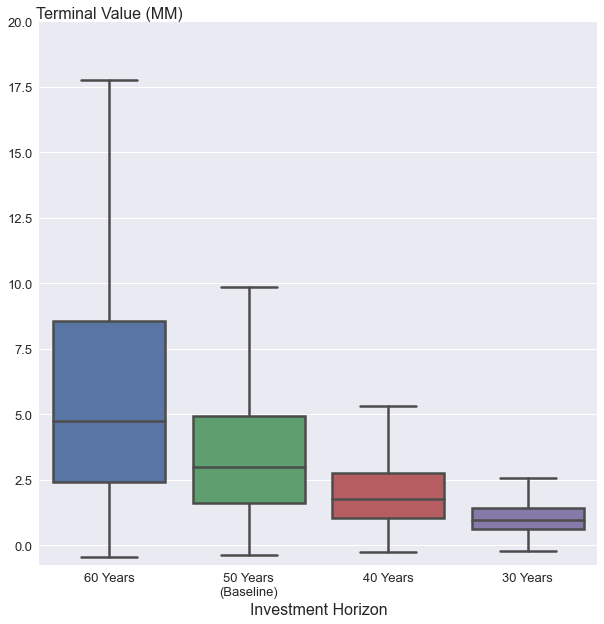

In [25]:
Data=variable("single_phase")
x = pd.melt(Data)
x['value'] = x['value'].div(1000000) #Convert into millions
f, ax = plt.subplots(figsize=(10,10))
ax = sns.boxplot(x='variable',y='value',data=x,showfliers = False,linewidth=2.5)
ax.set_ylabel("Terminal Value (MM)", rotation=0, loc='top', labelpad=-175)
plt.xlabel("Investment Horizon")
plt.ylim(-0.75,20)
plt.ticklabel_format(style='plain', axis='y',useOffset=True)
plt.savefig("Robustness/boxplot_INV_HOR_S.png", bbox_inches = 'tight', pad_inches = 0.1)

Finds defaulted for each strategy

In [9]:
Y60_defaulted = Y60.loc[(slice(None), '2080-01-01'),:]
Y60_defaulted = Y60_defaulted[Y60_defaulted['tv_u'] <= 0].reset_index()#.sample(n=5)
defaulted_Y60=Y60_defaulted['random_state'].tolist()

Y50_defaulted = Y50.loc[(slice(None), '2070-01-01'),:]
Y50_defaulted = Y50_defaulted[Y50_defaulted['tv_u'] <= 0].reset_index()#.sample(n=5)
defaulted_Y50=Y50_defaulted['random_state'].tolist()

Y40_defaulted = Y40.loc[(slice(None), '2060-01-01'),:]
Y40_defaulted = Y40_defaulted[Y40_defaulted['tv_u'] <= 0].reset_index()#.sample(n=5)
defaulted_Y40=Y40_defaulted['random_state'].tolist()

Y30_defaulted = Y30.loc[(slice(None), '2050-01-01'),:]
Y30_defaulted = Y30_defaulted[Y30_defaulted['tv_u'] <= 0].reset_index()#.sample(n=5)
defaulted_Y30=Y30_defaulted['random_state'].tolist()
#print number of defaults
print(len(defaulted_Y60))
print(len(defaulted_Y50))
print(len(defaulted_Y40))
print(len(defaulted_Y30))

137
112
91
73


Certainty equivalent

In [21]:
sharpe.CE_ports(Y30)
sharpe.CE_ports(Y40)
sharpe.CE_ports(Y50)
sharpe.CE_ports(Y60)

,dual_phase,single_phase,100,9050
Certainty Equivalent,"3,041,075.506479","3,347,623.141979","1,695,447.286946","2,309,055.033441"


Sharp ratio

In [16]:
sharpe2 = sharpe.calculate_sharpe(Y30)
sharpe3 = sharpe.calculate_sharpe(Y40)
sharpe4 = sharpe.calculate_sharpe(Y50)
sharpe5 = sharpe.calculate_sharpe(Y60)

In [17]:
mean_median_2 = [f'{x:.3f}' + " " f'[{y:.3f}]' for x, y in zip(sharpe2.mean(), sharpe2.median())]
mean_median_3 = [f'{x:.3f}' + " " f'[{y:.3f}]' for x, y in zip(sharpe3.mean(), sharpe3.median())]
mean_median_4 = [f'{x:.3f}' + " " f'[{y:.3f}]' for x, y in zip(sharpe4.mean(), sharpe4.median())]
mean_median_5 = [f'{x:.3f}' + " " f'[{y:.3f}]' for x, y in zip(sharpe5.mean(), sharpe5.median())]

In [19]:
print(mean_median_2)
print(mean_median_3)
print(mean_median_4)
print(mean_median_5)


['0.188 [0.245]', '0.187 [0.245]', '0.190 [0.192]', '0.175 [0.176]']
['0.170 [0.227]', '0.169 [0.226]', '0.200 [0.201]', '0.185 [0.184]']
['0.158 [0.210]', '0.157 [0.210]', '0.208 [0.208]', '0.193 [0.192]']
['0.150 [0.198]', '0.149 [0.197]', '0.215 [0.214]', '0.200 [0.198]']
